In [1]:
!pip install mglearn

In [2]:
#필요 라이브러리 임포트
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
%matplotlib inline
import seaborn as sns
plt.rcParams['axes.unicode_minus'] = False

import platform
path = 'c:/Windows/Fonts/malgun.ttf'
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~~')

Unknown system... sorry~~~~~


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
train = pd.read_csv("./train.csv", index_col='PassengerId')
train.head(20)
df1 = pd.DataFrame(train)
df1

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [4]:
train["FamilySize"] = train["SibSp"] + train["Parch"] + 1
train["BoardedAT"] = 0
train["BoardedAT"].loc[train["Embarked"] == "C"] = "FRA"
train["BoardedAT"].loc[train["Embarked"] != "C"] = "GBR"
train

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,BoardedAT
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,GBR
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,FRA
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,GBR
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,GBR
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,GBR
...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,1,GBR
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1,GBR
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,4,GBR


In [5]:
train["FamilySize"].head(20)

PassengerId
1     2
2     2
3     1
4     2
5     1
6     1
7     1
8     5
9     3
10    2
11    3
12    1
13    1
14    7
15    1
16    1
17    6
18    1
19    2
20    1
Name: FamilySize, dtype: int64

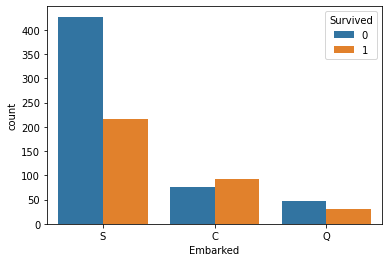

In [6]:
sns.countplot(data=train, x='Embarked', hue='Survived')

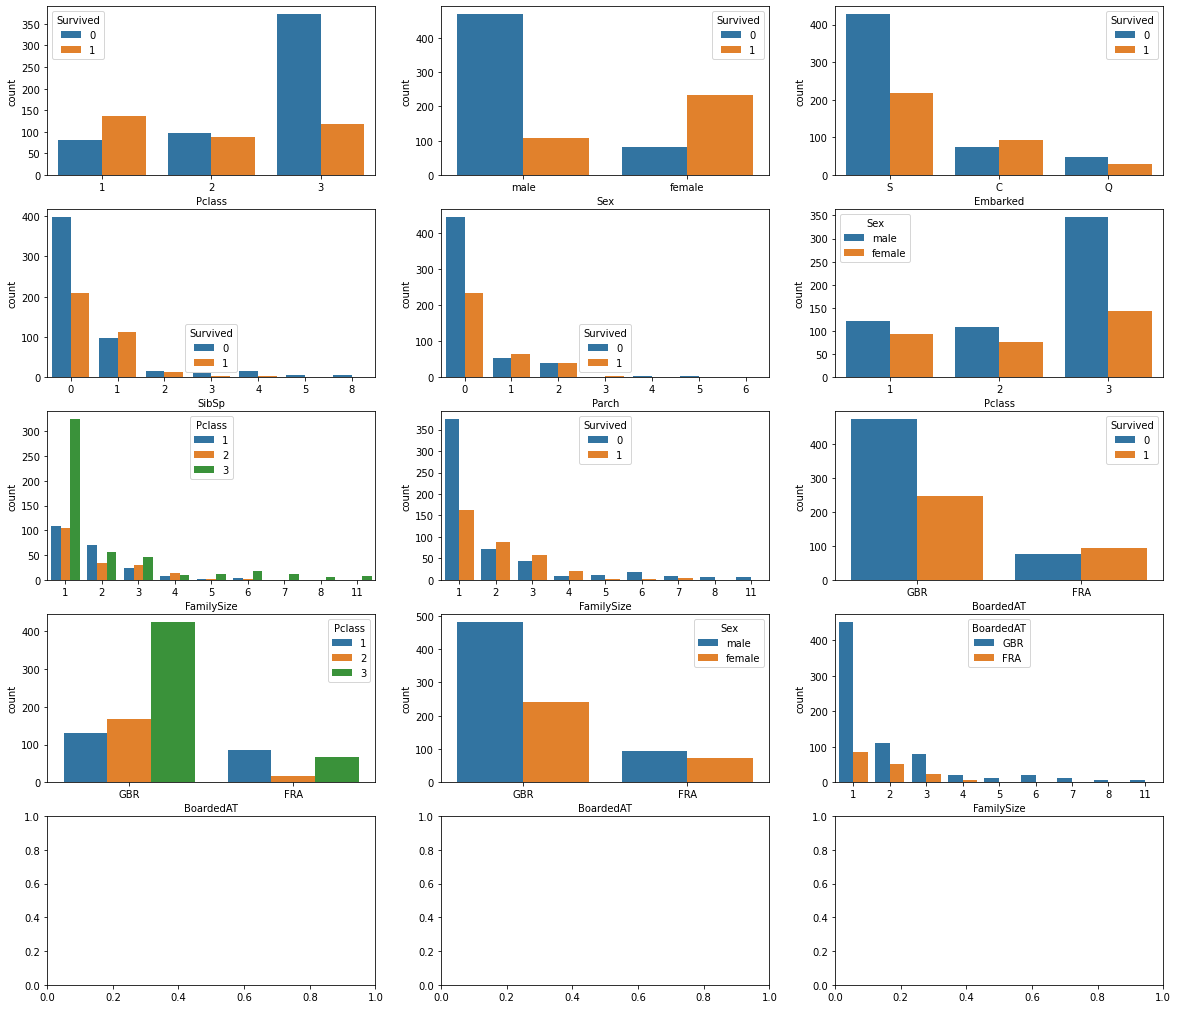

In [7]:
figure, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9), (ax10, ax11, ax12), (ax13, ax14, ax15)) = plt.subplots(nrows=5, ncols=3)
# plt.tight_layout()

figure.set_size_inches(20, 18)

sns.countplot(data=train, x='Pclass', hue='Survived', ax=ax1)
sns.countplot(data=train, x='Sex', hue='Survived', ax=ax2)
sns.countplot(data=train, x='Embarked', hue='Survived', ax=ax3)
sns.countplot(data=train, x='SibSp', hue='Survived', ax=ax4)
sns.countplot(data=train, x='Parch', hue='Survived', ax=ax5)
sns.countplot(data=train, x='Pclass', hue='Sex', ax=ax6)
sns.countplot(data=train, x='FamilySize', hue='Pclass', ax=ax7)
sns.countplot(data=train, x='FamilySize', hue='Survived', ax=ax8)
sns.countplot(data=train, x='BoardedAT', hue='Survived', ax=ax9)
sns.countplot(data=train, x='BoardedAT', hue='Pclass', ax=ax10)
sns.countplot(data=train, x='BoardedAT', hue='Sex', ax=ax11)
sns.countplot(data=train, x='FamilySize', hue='BoardedAT', ax=ax12)

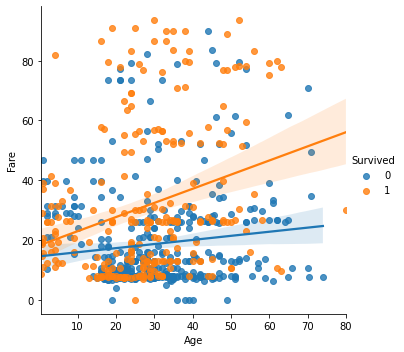

In [8]:
low_fare = train[train['Fare'] < 100]

sns.lmplot(data = low_fare, x='Age', y='Fare', hue='Survived')

In [9]:
train.loc[train["Cabin"].isnull(), "Cabin"] = 0
train.loc[train["Age"].isnull(), "Age"] = 0
train.loc[train["Embarked"].isnull(), "Embarked"] = 0

In [10]:
train.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin         0
Embarked      0
FamilySize    0
BoardedAT     0
dtype: int64

Age 컬럼의 결측치가 유독 많음
타이타닉호가 영국-미국 운행인 만큼 불법 이민자일 수도 있지 않을까 생각

In [11]:
train.loc[train["FamilySize"] == 6].sort_values(by="Ticket")

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,BoardedAT
PassengerId,,,,,,,,,,,,,
342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,C23 C25 C27,S,6,GBR
28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S,6,GBR
439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S,6,GBR
89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S,6,GBR
438,1,2,"Richards, Mrs. Sidney (Emily Hocking)",female,24.0,2,3,29106,18.7500,0,S,6,GBR
639,0,3,"Panula, Mrs. Juha (Maria Emilia Ojala)",female,41.0,0,5,3101295,39.6875,0,S,6,GBR
825,0,3,"Panula, Master. Urho Abraham",male,2.0,4,1,3101295,39.6875,0,S,6,GBR
267,0,3,"Panula, Mr. Ernesti Arvid",male,16.0,4,1,3101295,39.6875,0,S,6,GBR
165,0,3,"Panula, Master. Eino Viljami",male,1.0,4,1,3101295,39.6875,0,S,6,GBR


In [12]:
train.loc[train["Ticket"].duplicated()].sort_values(by="Ticket")

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,BoardedAT
PassengerId,,,,,,,,,,,,,
505,1,1,"Maioni, Miss. Roberta",female,16.0,0,0,110152,86.500,B79,S,1,GBR
760,1,1,"Rothes, the Countess. of (Lucy Noel Martha Dye...",female,33.0,0,0,110152,86.500,B77,S,1,GBR
559,1,1,"Taussig, Mrs. Emil (Tillie Mandelbaum)",female,39.0,1,1,110413,79.650,E67,S,3,GBR
586,1,1,"Taussig, Miss. Ruth",female,18.0,0,2,110413,79.650,E68,S,3,GBR
476,0,1,"Clifford, Mr. George Quincy",male,0.0,0,0,110465,52.000,A14,S,1,GBR
...,...,...,...,...,...,...,...,...,...,...,...,...,...
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,0.0,1,2,W./C. 6607,23.450,0,S,4,GBR
148,0,3,"Ford, Miss. Robina Maggie ""Ruby""",female,9.0,2,2,W./C. 6608,34.375,0,S,5,GBR
437,0,3,"Ford, Miss. Doolina Margaret ""Daisy""",female,21.0,2,2,W./C. 6608,34.375,0,S,5,GBR


In [13]:
train["Embarked"].loc[train["Fare"] >= 75]

PassengerId
28     S
32     C
35     C
53     C
62     0
      ..
830    0
836    C
850    C
857    S
880    C
Name: Embarked, Length: 97, dtype: object

In [14]:
test = pd.read_csv("./test.csv", index_col="PassengerId")

print(test.shape)
test.head()

(418, 10)


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [15]:
test.isnull().sum()

Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64

In [16]:
train.loc[train["Cabin"].isnull(), "Cabin"] = 0
train.loc[train["Age"].isnull(), "Age"] = 0
train.loc[train["Fare"].isnull(), "Fare"] = 0

In [17]:
test["FamilySize"] = test["SibSp"] + test["Parch"] + 1
test["BoardedAT"] = 0
test["BoardedAT"].loc[test["Embarked"] == "C"] = "FRA"
test["BoardedAT"].loc[test["Embarked"] != "C"] = "GBR"

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


전처리 개시

In [18]:
train.loc[train["Sex"] == "male", "Sex"] = 0
train.loc[train["Sex"] == "female", "Sex"] = 1
train.loc[train["BoardedAT"] == "GBR", "BoardedAT"] = 0
train.loc[train["BoardedAT"] == "FRA", "BoardedAT"] = 1

test.loc[test["Sex"] == "male", "Sex"] = 0
test.loc[test["Sex"] == "female", "Sex"] = 1
test.loc[test["BoardedAT"] == "GBR", "BoardedAT"] = 0
test.loc[test["BoardedAT"] == "FRA", "BoardedAT"] = 1

train["Embarked_C"] = train["Embarked"] == "C"
train["Embarked_S"] = train["Embarked"] == "S"
train["Embarked_Q"] = train["Embarked"] == "Q"

test["Embarked_C"] = test["Embarked"] == "C"
test["Embarked_S"] = test["Embarked"] == "S"
test["Embarked_Q"] = test["Embarked"] == "Q"

In [19]:
feature_names = ["Pclass", "Sex", "Fare", "FamilySize", "Embarked_C", "Embarked_S", "Embarked_Q"]
feature_names

['Pclass',
 'Sex',
 'Fare',
 'FamilySize',
 'Embarked_C',
 'Embarked_S',
 'Embarked_Q']

In [20]:
X_train = train[feature_names]

print(X_train.shape)
X_train.head()

(891, 7)


,Pclass,Sex,Fare,FamilySize,Embarked_C,Embarked_S,Embarked_Q
PassengerId,,,,,,,
1,3,0,7.2500,2,False,True,False
2,1,1,71.2833,2,True,False,False
3,3,1,7.9250,1,False,True,False
4,1,1,53.1000,2,False,True,False
5,3,0,8.0500,1,False,True,False


In [21]:
X_test = test[feature_names]

print(X_test.shape)
X_test.head()

(418, 7)


,Pclass,Sex,Fare,FamilySize,Embarked_C,Embarked_S,Embarked_Q
PassengerId,,,,,,,
892,3,0,7.8292,1,False,False,True
893,3,1,7.0000,2,False,True,False
894,2,0,9.6875,1,False,False,True
895,3,0,8.6625,1,False,True,False
896,3,1,12.2875,3,False,True,False


In [22]:
label_name = "Survived"

y_train = train[label_name]

print(y_train.shape)
y_train.head()

(891,)


PassengerId
1    0
2    1
3    1
4    1
5    0
Name: Survived, dtype: int64

In [23]:
X_train.head()

,Pclass,Sex,Fare,FamilySize,Embarked_C,Embarked_S,Embarked_Q
PassengerId,,,,,,,
1,3,0,7.2500,2,False,True,False
2,1,1,71.2833,2,True,False,False
3,3,1,7.9250,1,False,True,False
4,1,1,53.1000,2,False,True,False
5,3,0,8.0500,1,False,True,False


In [24]:
full_train_data = X_train.copy()
full_train_label = y_train.copy()
full_test_data   = X_test.copy()
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(full_train_data, full_train_label, random_state=0)

In [25]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=100, random_state=4)
forest.fit(X_train, y_train)
print("Training score : {:.3f}".format(forest.score(X_train, y_train)))
print("Test score : {:.3f}".format(forest.score(X_test, y_test)))

Training score : 0.919
Test score : 0.834
